# Préparation du dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
path = "C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC/dataset"

In [4]:
from sklearn import preprocessing

path = "C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC/dataset"
path_test = "C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC/dataset_test"


list_labels = ["cloudy", "rain", "shine", "sunrise"]
label_no_name = "no_name "

def photo_class(photo) :
    for label in list_labels :
        if label in photo[24:] : 
            return label
    return label_no_name
    
data_path = glob(path+'*/*.jp*')
data_test_path = glob(path_test+'*/*.jp*')

def data_fct(path) :
    list_photos = [file for file in path]
    print(len(list_photos))
    data = pd.DataFrame()
    data["image_path"] = list_photos
    data["label_name"] = data["image_path"].apply(lambda x : photo_class(x))
    return data

data = data_fct(data_path)
data_test = data_fct(data_test_path)

le = preprocessing.LabelEncoder()
le.fit(data["label_name"])
data["label"] = le.transform(data["label_name"])
data_test["label"] = le.transform(data_test["label_name"])
# data.head(5)
data_test.head(5)

400
29


,image_path,label_name,label
0,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
1,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
2,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
3,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
4,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0


In [16]:
len(data)

400

In [15]:
data_test

,image_path,label_name,label
0,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
1,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
2,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
3,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
4,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
5,C:/Document sur disque/Formation OpenClassRoom...,rain,1
6,C:/Document sur disque/Formation OpenClassRoom...,rain,1
7,C:/Document sur disque/Formation OpenClassRoom...,rain,1
8,C:/Document sur disque/Formation OpenClassRoom...,rain,1
9,C:/Document sur disque/Formation OpenClassRoom...,rain,1


In [11]:
data_path

['C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy10.jpg',
 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy100.jpg',
 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy11.jpg',
 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy12.jpg',
 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy13.jpg',
 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy14.jpg',
 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy15.jpg',
 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy16.jpg',
 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy17.jpg',
 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy18.jpg',
 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy19.jpg',
 'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy

In [5]:
data.shape

(400, 3)

In [6]:
data.groupby("label").count()

,image_path,label_name
label,,
0,100,100
1,100,100
2,100,100
3,100,100


cloudy


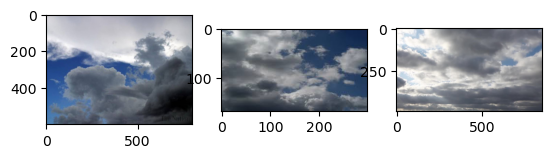

rain


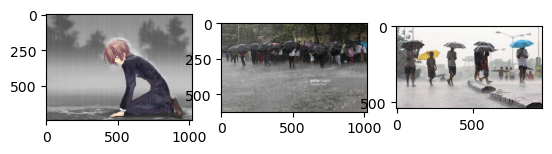

shine


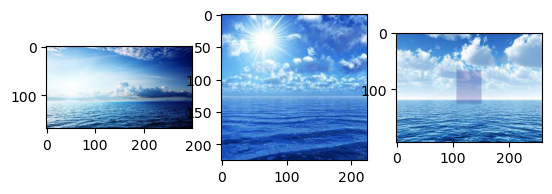

sunrise


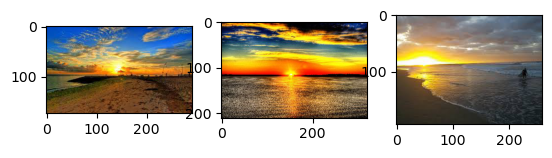

In [7]:
from matplotlib.image import imread

def list_fct(name) :
    list_image_name = [data["image_path"][i] for i in range(len(data)) if data["label_name"][i]==name]
    return list_image_name

list_cloudy=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="cloudy"]
list_rain=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="rain"]
list_shine=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="shine"]
list_sunrise=[data["image_path"][i] for i in range(len(data)) if data["label_name"][i]=="sunrise"]

for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = list_fct(name)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

# Etape 1 : étude de faisabilité

## Création du modèle pré-entraîné

In [8]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
data["image_path"][0]

'C:/Document sur disque/Formation OpenClassRooms/P6-DS-OC\\dataset\\cloudy10.jpg'

## Création des features des images

In [60]:
images_features = []
i=0 
for image_file in data["image_path"] :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300


(400, 4096)

## Réduction dimension et analyse

### Réduction de dimension PCA

In [61]:
from sklearn import manifold, decomposition

print(images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

(400, 4096)
(400, 292)


### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [62]:
from sklearn import manifold, decomposition
import time

temps1 = time.time()

tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

temps de T-SNE :             5.10 secondes


In [12]:
data

,image_path,label_name,label
0,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
1,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
2,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
3,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
4,C:/Document sur disque/Formation OpenClassRoom...,cloudy,0
...,...,...,...
395,C:/Document sur disque/Formation OpenClassRoom...,sunrise,3
396,C:/Document sur disque/Formation OpenClassRoom...,sunrise,3
397,C:/Document sur disque/Formation OpenClassRoom...,sunrise,3
398,C:/Document sur disque/Formation OpenClassRoom...,sunrise,3


In [14]:
data['image_path']

0      C:/Document sur disque/Formation OpenClassRoom...
1      C:/Document sur disque/Formation OpenClassRoom...
2      C:/Document sur disque/Formation OpenClassRoom...
3      C:/Document sur disque/Formation OpenClassRoom...
4      C:/Document sur disque/Formation OpenClassRoom...
                             ...                        
395    C:/Document sur disque/Formation OpenClassRoom...
396    C:/Document sur disque/Formation OpenClassRoom...
397    C:/Document sur disque/Formation OpenClassRoom...
398    C:/Document sur disque/Formation OpenClassRoom...
399    C:/Document sur disque/Formation OpenClassRoom...
Name: image_path, Length: 400, dtype: object

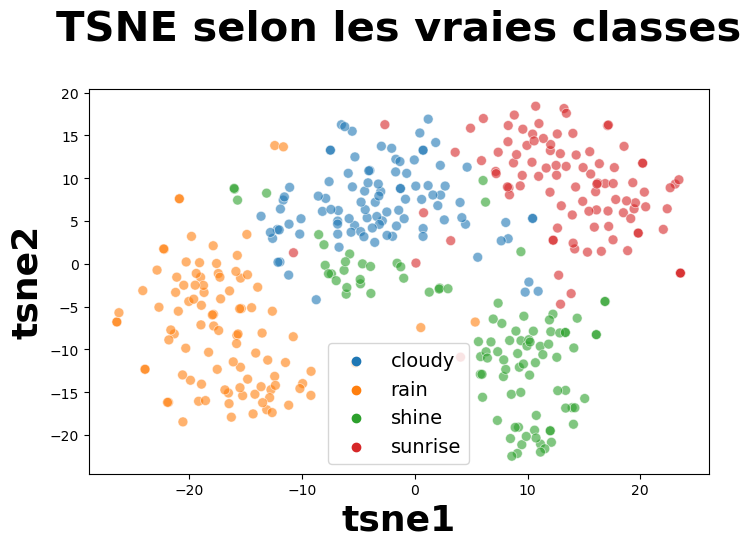

In [63]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="class",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


* L'analyse graphique montre visuellement qu'il est réalisable de séparer automatiquement les images selon leurs vraies classes
* Ceci suffit à démontrer la faisabilité de réaliser ultérieurement une classification supervisée pour déterminer automatiquement les classes des images
* Cette étape 1 est très rapide à mettre en oeuvre. Une conclusion négative sur la faisabilité aurait éviter de réaliser des traitements beaucoup plus lourd de classification supervisée
* Cette démarche en 2 étapes (1. Faisabilité, 2. Classification supervisée si étape 1 OK) s'inscrit dans une démarche agile de tout projet Data

### Création de clusters à partir du T-SNE et affichage des images selon clusters
* Attention : ici, il ne s'agit pas de faire une classification non supervisée, mais simplement, par une mesure de l'ARI, de conforter l'analyse graphique précédente qui démontre la faisabilité de réaliser ultérieurement une classification supervisée. Cette mesure de l'ARI nécessite de créer des clusters théoriques via KMeans
* Il s'agit donc de réaliser une mesure de ce que nous voyons graphiquement, donc à partir des données en sortie du t-sne
* Pour réaliser une classification non supervisée, il aurait fallu repartir des données avant t-sne
* Dans la démarche en 2 étapes, il n'est pas utile de réaliser une classification non supervisée, une classification supervisée est bien plus performante. Même le calcul de l'ARI n'est pas indispensable, nous pourrions passer directement du graphique t-sne précédent à l'étape 2 de classification supervisée
* Il n'est donc pas utile de passer du temps à optimiser l'ARI, un ordre de grandeur suffit pour conforter le 1er graphique t-sne. D'ailleurs la meilleure solution de feature engineering ne génère pas toujours le meilleur ARI. L'analyse graphique t-sne est bien plus riche d'enseignement


In [64]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=4, n_init=100)
cls.fit(X_tsne)

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, n_init=100)

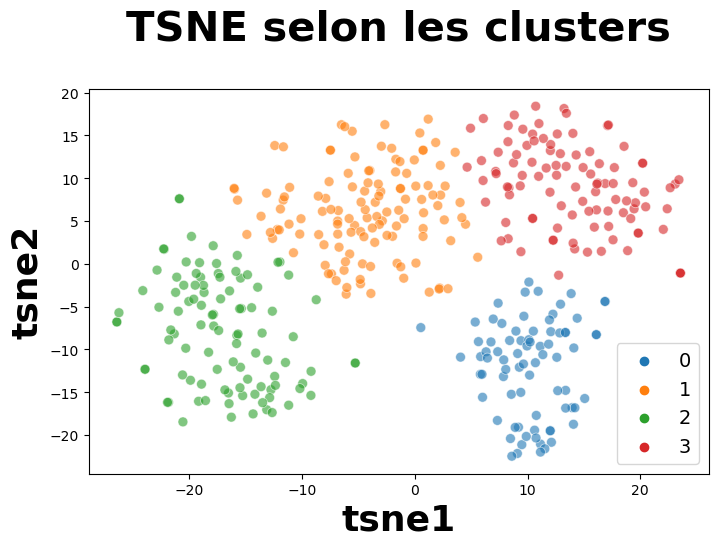

ARI :  0.6711604421566617


In [65]:
df_tsne["cluster"] = cls.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=4), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [66]:
# Analyse d'image "shine" affectées au cluster 3 "cloudy"

list_shine_0 = [i for i in range(len(data["image_path"])) \
                if (data.iloc[i]['label_name']=='shine') and (df_tsne.iloc[i]['cluster']==3)]
list_shine_0[0]

254

tsne1       6.322919
tsne2     -10.283804
class          shine
cluster            0
Name: 220, dtype: object


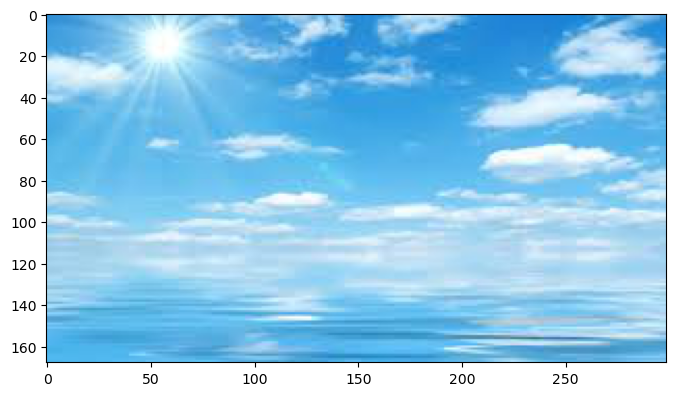

In [67]:
# Affichage image "shine" considérée comme "cloudy"
id = 220
print(df_tsne.iloc[id])
fig = plt.figure(figsize = (8, 5))
# plt.subplot(130 + 1 + i)
filename = data["image_path"][id]
image = imread(filename)
plt.imshow(image)
plt.show()



* Analyse : le modèle pré-entraîné confond "cloud" avec de la neige ...

### Analyse par classes

In [68]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[ 3 87  4  6]
 [ 2  3 95  0]
 [70 27  0  3]
 [ 3  6  0 91]]


In [69]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [70]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [2 0 1 3]
[[87  4  3  6]
 [ 3 95  2  0]
 [27  0 70  3]
 [ 6  0  3 91]]

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       100
           1       0.96      0.95      0.95       100
           2       0.90      0.70      0.79       100
           3       0.91      0.91      0.91       100

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.86       400



<Axes: >

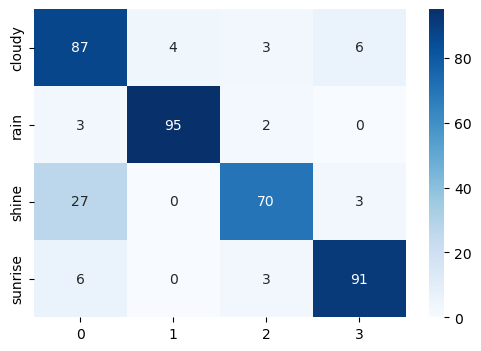

In [71]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

* La classe la moins bien prédite est "shine" (CF exemple ci-dessus : confond la neige avec un nuage)